# Identificação:

Matrícula: 117211159

Nome: Luiggy Ferreira Dias Silva

# Processamento de Texto

Neste notebook, nós vamos ver na prática como podemos aplicar algumas técnicas de processamento de texto programaticamente, usando algumas bibliotecas conhecidas.

## NLTK

Vamos começar usando a biblioteca  [NLTK (Natural Language Toolkit)](https://www.nltk.org/).

Primeiramente, vamos importar as bibliotecas python que vamos usar nesse tutorial:

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

%matplotlib inline

e vamos fazer o download de alguns módulos específicos do NLTK:

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

### Tokenization

#### Sentence Tokenization

In [ ]:
text = """Hello Mr. Smith, how are you doing today? 
    The weather is great, and city is awesome.
    The sky is pinkish-blue. You shouldn't eat cardboard
"""

tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


Nós também podemos tokenizar outras linguas:

In [ ]:
portuguese_text = "Bom dia, Sr. Smith. Como você está? O tempo está bom, e a cidade maravilhosa."

print(sent_tokenize(portuguese_text, "portuguese"))

['Bom dia, Sr. Smith.', 'Como você está?', 'O tempo está bom, e a cidade maravilhosa.']


#### Word Tokenization

In [ ]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


### Frequency Distribution

In [ ]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [ ]:
fdist

FreqDist({',': 2,
          '.': 2,
          '?': 1,
          'Hello': 1,
          'Mr.': 1,
          'Smith': 1,
          'The': 2,
          'You': 1,
          'and': 1,
          'are': 1,
          'awesome': 1,
          'cardboard': 1,
          'city': 1,
          'doing': 1,
          'eat': 1,
          'great': 1,
          'how': 1,
          'is': 3,
          "n't": 1,
          'pinkish-blue': 1,
          'should': 1,
          'sky': 1,
          'today': 1,
          'weather': 1,
          'you': 1})

In [ ]:
fdist.most_common(5)

[('is', 3), (',', 2), ('The', 2), ('.', 2), ('Hello', 1)]

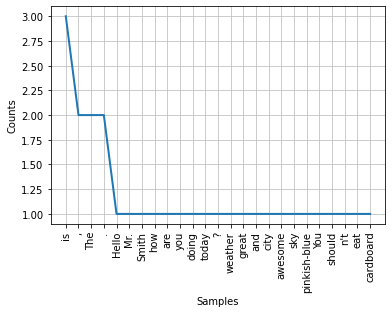

In [ ]:
fdist.plot(30, cumulative=False)
plt.show()

### Stopwords

In [ ]:
stop_words = set(stopwords.words("english"))

print(stop_words)

{'those', 'his', 'o', 'as', "wouldn't", 'yourself', 'hers', 'which', 'so', 'both', 'theirs', 'our', 'the', 'about', 'more', 'shouldn', 'up', 'yourselves', 'm', 'ma', 'hasn', 'having', "shouldn't", 'its', 'you', 'these', 'he', 'through', 'other', "you've", 'what', "won't", 'mustn', 'me', "it's", "couldn't", "don't", "didn't", 'wouldn', 'after', 'this', 'they', 'or', 'from', "wasn't", 'for', 'here', 'ourselves', 'myself', 'at', 'over', 'had', 'there', 'all', 'few', 'with', 'does', 'didn', 'shan', 'herself', 'll', 'won', 'such', 'them', 'out', 'have', 'no', 'now', 'not', 'are', 'before', 'too', 're', 'aren', 'that', 'was', 'than', 'did', 'doing', 's', 'do', 'on', 'any', "weren't", 'then', 'her', 'once', 'against', 'how', 'only', 'same', 'don', 'down', 'should', 'isn', 'we', 'whom', "hasn't", 'has', "doesn't", 'by', 'ain', "you'll", 'am', 'wasn', 'weren', 'ours', 'off', 'y', "isn't", 'being', 'nor', 'if', 'were', 'but', 'into', 'above', 'doesn', 'it', 'mightn', 'themselves', 'why', 'haven'

**TODO**: A partir da lista de palavras tokenizadas acima, gere uma nova lista de palavras que não contém stop words (use lista  comprehension)

In [ ]:
filtered_words = [word for word in tokenized_word if not word in stop_words]

print("Tokenized Words:", tokenized_word)
print("Filterd Sentence:", filtered_words)

Tokenized Words: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


### Stemming

A **Stemming** reduz as palavras aos seus radicais. Por exemplo, as palavras *connection*, *connected*, *connecting* serão reduzidas a "*connect*". Há diversos algoritmos de stemming, mas o mais famoso é o `Porter stemming`.

In [ ]:
example_words = ['connection', 'connected', 'connecting']

ps = PorterStemmer()

stemmed_words = [ps.stem(w) for w in example_words]

print("Example words:", example_words)
print("Stemmed words:", stemmed_words)

Example words: ['connection', 'connected', 'connecting']
Stemmed words: ['connect', 'connect', 'connect']


O algoritmo `SnowBall` pode faz o processo de stemming em até 13 línguas diferentes:

In [ ]:
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


Vamos ver como funciona em português!

**TODO:** Crie 4 listas de palavras em português (contendo ao menos 2 palavras cada - preferencialmente 3 ou mais) e, para cada uma das listas, gere uma outra lista com termos equivalentes "stemizados". Suas listas originais deve conter palavras que gerem stemings do tipo: verdadeiros positivos, verdadeiros negativos, falsos positivos, falsos negativos.

In [ ]:
tp = ["conectado", "conectando"]
tn = ["carro", "carroça"]
fp = ["redutível", "reduto"]
fn = ["conexão", "conexões"]

ss = SnowballStemmer("portuguese")

tp_stemmed = [ss.stem(word) for word in tp]
tn_stemmed = [ss.stem(word) for word in tn]
fp_stemmed = [ss.stem(word) for word in fp]
fn_stemmed = [ss.stem(word) for word in fn]

print('TP Stemmed:', tp_stemmed)
print('TN Stemmed:', tn_stemmed)
print('FP Stemmed:', fp_stemmed)
print('FN Stemmed:', fn_stemmed)

TP Stemmed: ['conect', 'conect']
TN Stemmed: ['carr', 'carroc']
FP Stemmed: ['redut', 'redut']
FN Stemmed: ['conexã', 'conexõ']


### Lemmatization

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(stemmer.stem(item),end='\t')

am	are	is	wa	were	

In [ ]:
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item),end='\t')

am	are	is	wa	were	

Esperava uma resposta diferente acima? Esperava que as saídas fossem todas "be" ?

Esse problema acontece porque o lamatizador não sabe que estamos tratando de um verbo!

**TODO:** Faça um código equivalente ao anterior, porém, passando o valor 'v' (Verbo) no parâmetro `pos` (Part-Of-Spreech).  

In [ ]:
#seu código aqui
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item, pos='v'),end='\t')

be	be	be	be	be	

**TODO:** Agora faça um código equivalente ao anterior, porém, passando a constante wordnet.VERB no parâmetro `pos` (Part-Of-Spreech).  

In [ ]:
#seu código aqui
lemmatizer = WordNetLemmatizer( )
for item in ['am' ,'are' ,'is','was','were']:
    print(lemmatizer.lemmatize(item, pos=wordnet.VERB),end='\t')

be	be	be	be	be	

### POS Tagging

Conjunto de Tags Baseado no [Penn Treebank Tag Set](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [ ]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens = nltk.word_tokenize(sent)
print('Sentence:', tokens)
print(nltk.pos_tag(tokens))

Sentence: ['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']
[('Albert', 'NNP'), ('Einstein', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Ulm', 'NNP'), (',', ','), ('Germany', 'NNP'), ('in', 'IN'), ('1879', 'CD'), ('.', '.')]


**TODO:** Formule uma frase (mesmo que não faça sentido) de forma que o POS Tagger classifique 'Albert' como verbo.

In [ ]:
sent = "I Albert apple"

tokens = nltk.word_tokenize(sent)
print('Sentence:', tokens)
print(nltk.pos_tag(tokens))

Sentence: ['I', 'Albert', 'apple']
[('I', 'PRP'), ('Albert', 'VBP'), ('apple', 'NN')]


**TODO:** Agora formule duas sentenças (que façam sentido) onde a mesma palavra é classificada de uma forma na sentença 1 e de outra forma na sentença 2.

In [ ]:
sents = ['I did study today', 'Did i study today?']

for sent in sents:
  tokens = nltk.word_tokenize(sent)
  print('Sentence:', tokens)
  print(nltk.pos_tag(tokens))

Sentence: ['I', 'did', 'study', 'today']
[('I', 'PRP'), ('did', 'VBD'), ('study', 'VB'), ('today', 'NN')]
Sentence: ['Did', 'i', 'study', 'today', '?']
[('Did', 'NNP'), ('i', 'NN'), ('study', 'NN'), ('today', 'NN'), ('?', '.')]


### Lemmatization com POS-Tagging

Vamos automatizar o processo de lematização: vamos detectar a POS-TAG com nltk.pos_tag e então passá-la para o wordnet lemmatizer.

In [ ]:
# seu código aqui

# Esta atividade eh mais demorada. Se preferir, pula-a e depois volte para fazer.

## Outras Bibliotecas

Vamos conhecer outras libs que nos ajudam nesse tipo de tarefa

### Lematização usando [Stanza](https://stanfordnlp.github.io/stanza/)

In [ ]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 14.3 MB/s 
     |████████████████████████████████| 4.4 MB 58.1 MB/s 
     |████████████████████████████████| 175 kB 90.7 MB/s 
     |████████████████████████████████| 6.6 MB 46.4 MB/s 
     |████████████████████████████████| 101 kB 10.1 MB/s 
     |████████████████████████████████| 596 kB 41.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=60251d955f1cbd1ea15c4e604701af2f7cf28555d9de47dbb235dd7e7170de00
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**TODO:** complete o código abaixo

In [ ]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma')

# Seu código aqui
# Substitua a string vazia por uma sequencia de termos separados por espaço)
text = "I'm very busy."
doc = nlp(text)

# Seu código aqui
# Imprima lado a lado os termos com seus repectivos lemas
# Em uma única expressão usando list comprehension, gere o lemas para os termos acima, manipulando doc.sentences, doc.sentences.words
# O texto e o lema podem ser obtidos com .word e .lemma em cada item (cada word em doc.sentences.words))

words = [word.words for word in doc.sentences][0]
[print(word.text,"-" ,word.lemma) for word in words]

2022-06-30 22:39:40 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-06-30 22:39:40 INFO: Use device: cpu
2022-06-30 22:39:40 INFO: Loading: tokenize
2022-06-30 22:39:40 INFO: Loading: pos
2022-06-30 22:39:40 INFO: Loading: lemma
2022-06-30 22:39:40 INFO: Done loading processors!


I - I
'm - be
very - very
busy - busy
. - .


[None, None, None, None, None]

### Lematização usando [Spacy](https://spacy.io) - [lemminflect](https://spacy.io/universe/project/lemminflect/)

In [ ]:
!pip install lemminflect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 769 kB 28.6 MB/s 


**TODO:** Complete o código

In [ ]:
import spacy
import lemminflect

nlp = spacy.load('en_core_web_sm')
doc = nlp("I'm very busy.") # seu código aqui (similar ao anterior)

# aqui podemos iterar em 'doc'
print(f"{'Text':{8}} | {'Lemma':{6}}\n")
for token in doc:
    print(f"{token.text:{8}} , {token._.lemma()}" ) # seu código aqui (complete o código para montar a tabela)


Text     | Lemma 

I        , I
'm       , be
very     , very
busy     , busy
.        , .
